In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
import seaborn as sb
import pygmnormalize as gmn
from scipy.cluster import hierarchy

### Load Data

In [2]:
# 325 patients; expression data and clinical data
gene_data = pd.read_csv('data/study_1/expression_data.csv')
clinical_data = pd.read_csv('data/study_1/clinical_data.csv')

In [3]:
gene_data

,Gene_Name,CGGA_1001,CGGA_1006,CGGA_1007,CGGA_1011,CGGA_1015,CGGA_1019,CGGA_1022,CGGA_1023,CGGA_1024,...,CGGA_1246,CGGA_1275,CGGA_1450,CGGA_1460,CGGA_1475,CGGA_243,CGGA_247,CGGA_738,CGGA_759,CGGA_D30
0,A1BG,12.64,7.03,30.09,6.64,1.83,39.03,12.96,9.28,2.35,...,4.46,28.42,19.32,2.24,18.89,4.03,5.29,4.64,7.07,31.41
1,A1BG-AS1,2.12,1.13,6.64,4.32,1.39,4.46,3.25,1.90,1.22,...,1.57,8.36,2.21,1.60,5.31,2.47,3.69,0.85,1.99,2.65
2,A2M,452.92,106.54,206.70,707.17,824.32,155.14,538.33,26.39,219.35,...,87.20,243.89,73.80,111.50,340.53,108.06,97.24,160.70,263.66,192.54
3,A2M-AS1,3.30,0.13,0.63,1.61,1.34,3.08,0.72,1.96,1.48,...,0.42,1.02,0.22,0.15,0.91,0.33,0.03,0.38,0.48,2.51
4,A2ML1,0.04,0.33,4.96,1.59,0.00,0.10,0.39,2.34,0.68,...,2.58,0.55,0.15,1.75,0.05,1.55,0.71,3.33,0.60,3.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24321,ZYG11A,0.02,0.49,0.21,0.04,0.02,0.02,0.00,0.02,0.00,...,0.01,0.04,0.00,0.04,0.03,0.00,0.25,0.53,0.00,0.02
24322,ZYG11B,3.81,7.84,8.09,5.68,7.04,3.73,9.42,1.79,7.66,...,6.46,3.27,4.43,7.43,7.30,10.26,8.81,9.91,7.53,7.49
24323,ZYX,158.36,761.56,92.85,158.75,380.73,374.88,115.05,117.83,147.99,...,26.78,301.38,60.35,243.20,112.77,21.45,67.38,72.42,86.75,85.42
24324,ZZEF1,6.56,5.86,9.78,11.48,11.71,7.42,7.40,9.56,5.79,...,11.93,4.53,8.97,10.09,9.98,14.00,17.09,15.13,12.51,4.20


### Sample Data Samples - Expression

In [4]:
gene_data.head()

,Gene_Name,CGGA_1001,CGGA_1006,CGGA_1007,CGGA_1011,CGGA_1015,CGGA_1019,CGGA_1022,CGGA_1023,CGGA_1024,...,CGGA_1246,CGGA_1275,CGGA_1450,CGGA_1460,CGGA_1475,CGGA_243,CGGA_247,CGGA_738,CGGA_759,CGGA_D30
0,A1BG,12.64,7.03,30.09,6.64,1.83,39.03,12.96,9.28,2.35,...,4.46,28.42,19.32,2.24,18.89,4.03,5.29,4.64,7.07,31.41
1,A1BG-AS1,2.12,1.13,6.64,4.32,1.39,4.46,3.25,1.90,1.22,...,1.57,8.36,2.21,1.60,5.31,2.47,3.69,0.85,1.99,2.65
2,A2M,452.92,106.54,206.70,707.17,824.32,155.14,538.33,26.39,219.35,...,87.20,243.89,73.80,111.50,340.53,108.06,97.24,160.70,263.66,192.54
3,A2M-AS1,3.30,0.13,0.63,1.61,1.34,3.08,0.72,1.96,1.48,...,0.42,1.02,0.22,0.15,0.91,0.33,0.03,0.38,0.48,2.51
4,A2ML1,0.04,0.33,4.96,1.59,0.00,0.10,0.39,2.34,0.68,...,2.58,0.55,0.15,1.75,0.05,1.55,0.71,3.33,0.60,3.86


### Sample Data Samples - Clinical

In [5]:
clinical_data.head()

,CGGA_ID,PRS_type,Histology,Grade,Gender,Age,OS,Censor,Radio_status,Chemo_status,IDH_mutation_status,1p19q_codeletion_status
0,CGGA_1001,Primary,GBM,WHO IV,Male,11,3428.0,0.0,0.0,1.0,Wildtype,Non-codel
1,CGGA_1006,Primary,AA,WHO III,Male,42,254.0,1.0,1.0,1.0,Wildtype,Non-codel
2,CGGA_1007,Primary,GBM,WHO IV,Female,57,345.0,1.0,1.0,1.0,Wildtype,Non-codel
3,CGGA_1011,Primary,GBM,WHO IV,Female,46,109.0,1.0,1.0,0.0,Wildtype,Non-codel
4,CGGA_1015,Primary,GBM,WHO IV,Male,62,164.0,1.0,1.0,0.0,Wildtype,Non-codel


### Data Statistics

In [6]:
print(f'Number of Data Samples: {len(gene_data.columns)-1}')
print(f'Number of Genes: {len(gene_data.index)}')

Number of Data Samples: 325
Number of Genes: 24326


The original data set consists of 325 data samples with 24000+ genes.

## Data Preprocessing

- Impute the class labels (tumor grade) and histology data as some of the values are 'NaN'
- Impute using the most frequent value in the column

In [4]:
class_label_col = ['Grade']
histology_col = ['Histology']
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
class_labels = imputer.fit_transform(clinical_data[class_label_col])
histology = imputer.fit_transform(clinical_data[histology_col])
class_labels_categories = list(np.unique(class_labels))

### Visualize Class Distribution

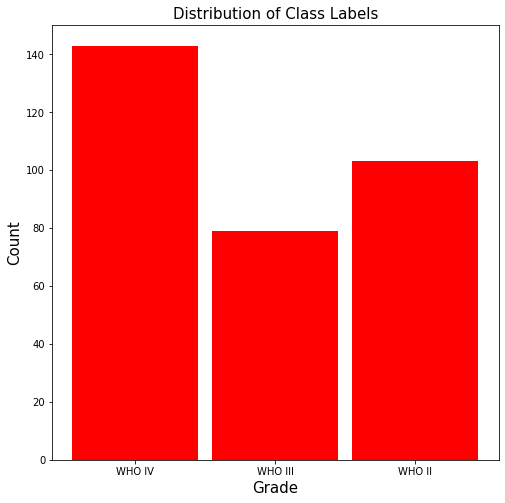

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.hist(class_labels, bins=range(4),  color=['red'], rwidth=0.90, align='left')
ax.set_xlabel('Grade', size=15)
ax.set_ylabel('Count', size=15)
ax.set_title('Distribution of Class Labels', size=15)
plt.show()

In [9]:
unique, counts = np.unique(class_labels, return_counts=True)
print('Counts for labels: ')
for i in range(len(unique)):
    print(f'Class: {unique[i]}, Count: {counts[i]}')

Counts for labels: 
Class: WHO II, Count: 103
Class: WHO III, Count: 79
Class: WHO IV, Count: 143


### Visualize Histology Distribution

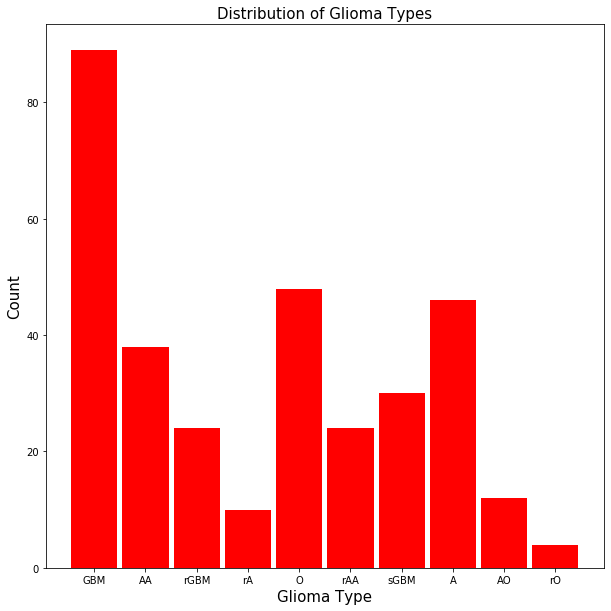

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.hist(histology, bins=range(11),  color=['red'], rwidth=0.90, align='left')
ax.set_xlabel('Glioma Type', size=15)
ax.set_ylabel('Count', size=15)
ax.set_title('Distribution of Glioma Types', size=15)
plt.show()

In [28]:
unique, counts = np.unique(histology, return_counts=True)
print('Counts for glioma types: ')
for i in range(len(unique)):
    print(f'Type: {unique[i]}, Count: {counts[i]}')

Counts for glioma types: 
Type: A, Count: 46
Type: AA, Count: 38
Type: AO, Count: 12
Type: GBM, Count: 89
Type: O, Count: 48
Type: rA, Count: 10
Type: rAA, Count: 24
Type: rGBM, Count: 24
Type: rO, Count: 4
Type: sGBM, Count: 30


## Further data processing
- Select a subset of the over 24 000 features to investigate and analyze 
- NOTE: the paper that used the Chinese Glioma data did a feature selection thing called t-SNE. I tried to do it but couldn't figure it out
<br/><br/>
- This is the 'standard pipeline' for bulk RNA-seq DATA according to Townes, F.W., Hicks, S.C., Aryee, M.J. et al. Feature selection and dimension reduction for single-cell RNA-Seq based on a multinomial model. Genome Biol 20, 295 (2019). https://doi.org/10.1186/s13059-019-1861-6:
    - "First, raw counts are normalized by scaling of sample-specific size factors, followed by log transformation, which attempts to reduce skewness. 
    - Next, feature selection involves identifying the top 500–2000 genes by computing either their coefficient of variation (highly variable genes [16, 17]) or average expression level (highly expressed genes) across all cells [15]. 
    - Principal component analysis (PCA) [19] is the most popular dimension reduction method (see for example tutorials for Seurat [17] and Cell Ranger [5]). 
        - PCA compresses each cell’s 2000-dimensional expression profile into, say, a 10-dimensional vector of principal component coordinates or latent factors. 
        - Prior to PCA, data are usually centered and scaled so that each gene has mean 0 and standard deviation 1 (z-score transformation). 
    - Finally, a clustering algorithm can be applied to group cells with similar representations in the low-dimensional PCA space."
<br/><br/>
- There are a lot more exploration and additional quality control steps suggested in https://kkorthauer.org/fungeno2019/singlecell/vignettes/1.1-preprocess-readcounts.html
<br/><br/>
- I did the selecting by variance and the PCA (with scaling)
- Still need to do:
    - Normalization of raw counts
        - Trimmed Mean of M 
            - Recommended by: https://hbctraining.github.io/DGE_workshop/lessons/02_DGE_count_normalization.html
            - Explanation/derivation: https://genomebiology-biomedcentral-com.ezproxy.cul.columbia.edu/articles/10.1186/gb-2010-11-3-r25
        - Log transformation (?)
        - Size factors (?)
    - Other quality control exploration/preprocessing (?)
    - Can also try selecting by expression level instead of variance

### Train-Test split

In [5]:
# Store the gene_names in a separate column so that we can work on the gene_data matrix directly
gene_names = gene_data['Gene_Name']
gene_data = gene_data.drop(columns=['Gene_Name'])

In [108]:
# Train-test split 90/10 as this is train/test. 
# We may further split the training data into training and validation data
# stratify=class_labels will make sure that the different classes are equally represented between the training
# and testing data
train_genes, test_genes, train_lbl, test_lbl = train_test_split(gene_data.T, class_labels, 
                                                                test_size=0.10, 
                                                                random_state=0,
                                                                shuffle=True, 
                                                                stratify=class_labels)

### Filter based on read count (i.e. 70% of samples have < 1 count for this gene)

In [110]:
low_exp = []
for i in train_genes.columns:
    count = 0
    for j in train_genes[i]:
        if j < 1: 
            count += 1
    if count/325 >= 0.70:
        low_exp.append(i)

In [112]:
cols_filtered = [x for x in train_genes.columns if x not in low_exp]
train_genes = train_genes[cols_filtered]

### Sequence Data Normalization
- Both of the methods below seem to be good options for normalizing data when comparing gene expression across different samples (and therefore across different gliomas)

#### Trimmed Mean of M
- Uses log2 transform on the data as part of the normalization (log ratio) but the final values arent log values?
- Will apply log transform after the data is normalized

In [113]:
# Training Date before applying TMM
train_genes

,0,1,2,4,7,9,10,12,13,14,...,24315,24316,24317,24318,24319,24320,24322,24323,24324,24325
CGGA_171,12.66,1.21,188.46,1.14,1.93,25.41,4.26,7.95,3.18,12.23,...,4.43,2.06,3.90,1.57,3.05,2.68,4.59,35.90,3.56,5.64
CGGA_1024,2.35,1.22,219.35,0.68,4.32,25.78,8.05,6.68,6.91,22.71,...,6.84,6.93,18.18,1.43,3.08,9.56,7.66,147.99,5.79,10.36
CGGA_835,7.11,1.73,82.60,3.43,1.36,36.54,3.99,7.10,4.36,10.29,...,4.49,2.18,5.92,2.14,4.49,6.74,5.21,45.83,4.60,4.43
CGGA_738,4.64,0.85,160.70,3.33,2.69,38.59,8.70,8.09,5.38,9.99,...,3.52,2.85,6.89,2.60,3.89,12.87,9.91,72.42,15.13,12.23
CGGA_479,13.11,2.65,133.27,1.14,6.01,27.09,4.40,7.01,3.63,8.20,...,4.04,3.69,3.80,2.48,3.81,11.88,5.88,51.67,11.34,7.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGGA_727,22.93,5.14,151.25,7.55,1.73,25.45,5.55,9.96,5.44,15.23,...,5.95,4.27,7.01,2.39,3.71,12.89,7.48,56.54,9.85,20.26
CGGA_591,13.55,4.09,122.55,16.45,1.59,25.52,3.16,7.07,6.49,13.58,...,4.89,1.33,1.50,2.77,4.20,13.24,9.97,48.87,9.61,15.74
CGGA_752,2.78,1.16,169.87,4.29,2.59,33.95,7.46,7.05,4.32,14.15,...,4.91,4.24,8.16,2.27,3.24,9.24,5.96,48.13,10.60,7.76
CGGA_1129,16.81,3.10,71.13,0.80,1.68,55.73,11.07,8.27,4.22,15.47,...,5.00,12.85,18.11,1.13,2.17,9.13,6.42,99.38,11.96,11.21


In [114]:
# Training data after applying TMM
# Expect genes as rows and samples as columns
normalized_tmm_train_genes = gmn.tmm_normalization(train_genes.T).T
normalized_tmm_train_genes

,0,1,2,4,7,9,10,12,13,14,...,24315,24316,24317,24318,24319,24320,24322,24323,24324,24325
CGGA_171,18.586436,1.776429,276.682446,1.673660,2.833477,37.305003,6.254204,11.671577,4.668631,17.955143,...,6.503785,3.024333,5.725679,2.304953,4.477775,3.934569,6.738684,52.705613,5.226518,8.280213
CGGA_1024,2.436149,1.264724,227.391214,0.704928,4.478368,26.725076,8.345107,6.924884,7.163316,23.542532,...,7.090750,7.184049,18.846466,1.482423,3.192911,9.910463,7.940810,153.415208,6.002257,10.739790
CGGA_835,8.503976,2.069181,98.794437,4.102481,1.626640,43.703980,4.772274,8.492016,5.214815,12.307443,...,5.370303,2.607408,7.080667,2.559565,5.370303,8.061435,6.231465,54.815364,5.501869,5.298539
CGGA_738,4.307423,0.789075,149.181639,3.091318,2.497191,35.824017,8.076417,7.510140,4.994382,9.273955,...,3.267700,2.645723,6.396151,2.413642,3.611180,11.947528,9.199689,67.229212,14.045540,11.353400
CGGA_479,16.415838,3.318228,166.875575,1.427464,7.525491,33.921058,5.509511,8.777653,4.545347,10.267725,...,5.058733,4.620476,4.758214,3.105361,4.770736,14.875680,7.362710,64.699189,14.199512,9.153301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGGA_727,21.512304,4.822209,141.898645,7.083205,1.623039,23.876499,5.206859,9.344202,5.103660,14.288373,...,5.582129,4.005998,6.576592,2.242233,3.480621,12.093048,7.017533,53.044294,9.241003,19.007382
CGGA_591,14.855826,4.484157,134.360258,18.035302,1.743230,27.979386,3.464532,7.751342,7.115447,14.888717,...,5.361254,1.458173,1.644556,3.036947,4.604758,14.515951,10.930818,53.579647,10.536125,17.256878
CGGA_752,2.884385,1.203556,176.248388,4.451084,2.687251,35.224776,7.740113,7.314718,4.482210,14.681313,...,5.094364,4.399206,8.466397,2.355235,3.361658,9.586949,6.183790,49.937216,10.998016,8.051377
CGGA_1129,15.236508,2.809826,64.471910,0.725116,1.522744,50.513419,10.033798,7.495891,3.824989,14.021938,...,4.531977,11.647182,16.414822,1.024227,1.966878,8.275391,5.819059,90.077582,10.840490,10.160693


#### Relative Log Expression
- I read that this method is another normalization technique we could use but I couldn't find any straight-forward algorithm explanation or python code to implement it. 

### Log Transformation of data
#### Dipika's Questions:
- Not positive if this is needed or not after normalizing?
- Should we plot what the data after we normalize and log-transform

In [115]:
log_normalized_tmm_train_genes = pd.DataFrame(np.log2(normalized_tmm_train_genes, out=np.zeros_like(normalized_tmm_train_genes), where=(normalized_tmm_train_genes!=0)))
log_normalized_tmm_train_genes

,0,1,2,3,4,5,6,7,8,9,...,17707,17708,17709,17710,17711,17712,17713,17714,17715,17716
0,4.216178,0.828980,8.112087,0.743007,1.502574,5.221297,2.644826,3.544928,2.223000,4.166325,...,2.701279,1.596617,2.517447,1.204737,2.162782,1.976206,2.752467,5.719885,2.385850,3.049668
1,1.284603,0.338823,7.829033,-0.504452,2.162973,4.740122,3.060931,2.791790,2.840628,4.557198,...,2.825938,2.844797,4.236222,0.567957,1.674872,3.308952,2.989286,7.261298,2.585505,3.424894
2,3.088138,1.049060,6.626358,2.036497,0.701895,5.449693,2.254677,3.086107,2.382616,3.621459,...,2.425003,1.382616,2.823885,1.355899,2.425003,3.011037,2.639571,5.776508,2.459922,2.405595
3,2.106825,-0.341765,7.220926,1.628222,1.320306,5.162855,3.013715,2.908840,2.320306,3.213185,...,1.708275,1.403662,2.677204,1.271212,1.852470,3.578640,3.201585,6.071016,3.812040,3.505053
4,4.037017,1.730413,7.382629,0.513455,2.911786,5.084109,2.461924,3.133835,2.184390,3.360045,...,2.338776,2.208042,2.250420,1.634761,2.254212,3.894884,2.880237,6.015676,3.827769,3.194292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,4.427090,2.269694,7.148717,2.824402,0.698698,4.577519,2.380413,3.224071,2.351532,3.836770,...,2.480815,2.002162,2.717340,1.164936,1.799345,3.596106,2.810964,5.729126,3.208049,4.248488
288,3.892957,2.164837,7.069963,4.172752,0.801763,4.806292,1.792661,2.954446,2.830954,3.896148,...,2.422570,0.544162,0.717698,1.602622,2.203125,3.859567,3.450329,5.743613,3.397272,4.109100
289,1.528264,0.267304,7.461466,2.154157,1.426131,5.138519,2.952355,2.870802,2.164210,3.875909,...,2.348902,2.137243,3.081748,1.235871,1.749173,3.261072,2.628491,5.642043,3.459171,3.009236
290,3.929460,1.490481,6.010599,-0.463716,0.606674,5.658595,3.326796,2.906100,1.935456,3.809614,...,2.180141,3.541909,4.036927,0.034535,0.975908,3.048827,2.540786,6.493096,3.438358,3.344927


#### Selecting Features based on Variance
##### Dipika's Questions 
- Coefficient of Variance is actually used to remove genes which have a variance GREATER than some cuttoff. Do you think we should consider using that?
- Also in this link, they do it prior to normalization http://bioconductor.org/packages/release/bioc/vignettes/DaMiRseq/inst/doc/DaMiRseq.pdf ?

#### Visualize the variances of the genes
- We can the use the plots below to select an appropriate cutoff variance 

#### Dipika's modified code

In [116]:
selector = VarianceThreshold(threshold=0.75)
filtered_train = pd.DataFrame(selector.fit_transform(log_normalized_tmm_train_genes))

print(f"Filter reduced number of genes by {len(gene_data.index) - len(filtered_train[0])} from {len(gene_data.index)} to {len(filtered_train[0])}")

Filter reduced number of genes by 24034 from 24326 to 292


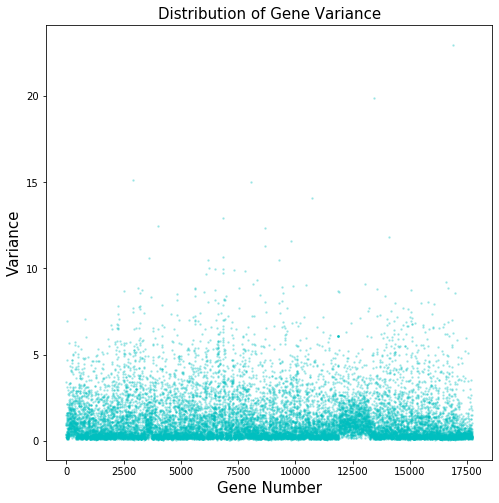

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(selector.variances_, 'c.', alpha=0.25, markersize=3)
ax.set_xlabel('Gene Number', size=15)
ax.set_ylabel('Variance', size=15)
ax.set_title('Distribution of Gene Variance', size=15)
plt.show()

#### Close-up of the distribution

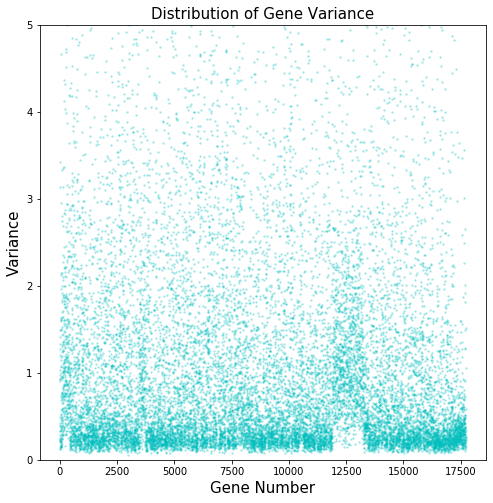

In [118]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(selector.variances_, 'c.', alpha=0.25, markersize=3)
ax.set_xlabel('Gene Number', size=15)
ax.set_ylabel('Variance', size=15)
ax.set_ylim(bottom=0, top = 5)
ax.set_title('Distribution of Gene Variance', size=15)
plt.show()

#### Dipika's Questions:
- Is there a reason you didnt fit the feature selector on the scaled data?

In [ ]:
# Make an instance of VarianceThreshold model
selector = VarianceThreshold(12)

# Eliminate genes with <50% variance
selector.fit(train_genes)
train_genes_filtered = selector.transform(train_genes_scaled)
test_genes_filtered = selector.transform(test_genes_scaled)

print(f"Filter reduced number of genes by {len(gene_data.index) - len(train_genes_filtered[0])} from {len(gene_data.index)} to  {len(train_genes_filtered[0])}")

#### Remove highly correlated features
- This can decrease the dimensionality of the data while eliminating redundancy

In [119]:
cov = abs(filtered_train.corr().to_numpy())

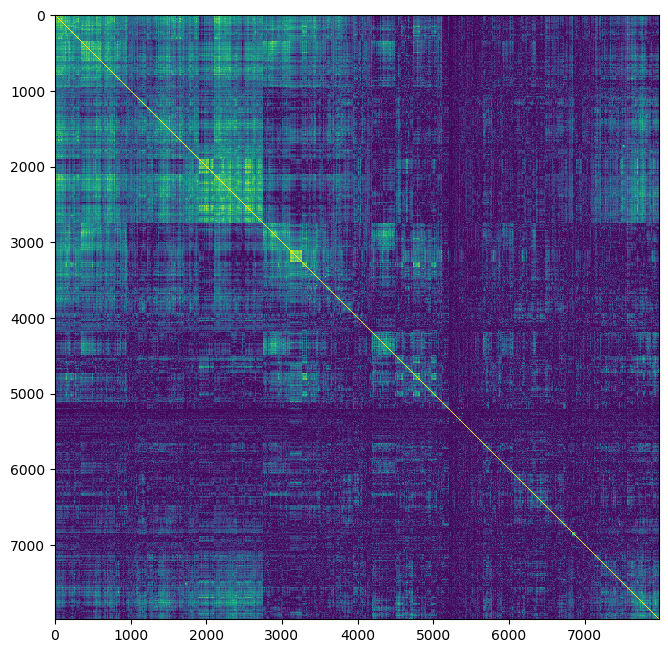

In [120]:
order = np.array(hierarchy.dendrogram(hierarchy.ward(cov),no_plot=True)['ivl'], dtype=int)
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(cov[order, :][:, order])
plt.show()

In [121]:
filtered_cov = []
for i in range(len(filtered_train.columns)):
    row = []
    for j in range(len(filtered_train.columns)):
        if cov[i][j] > 0.70 and i != j:
            row.append(j)
    filtered_cov.append(row)

In [122]:
filtered = []
for i in range(len(filtered_cov)):
    if len(filtered_cov[i]) > 0:
        filtered.append(i)

In [123]:
to_remove = []
to_keep = []
for gene in filtered:
    # The gene is not correlated to anything we've seen so far
    if gene not in to_remove:
        # remove all values 
        vals = filtered_cov[gene]
        for val in vals:
            if val not in to_remove:
                to_remove.append(val)
        to_keep.append(gene)

#### Get the new filtered features

In [124]:
cols_filtered = [x for x in filtered_train.columns if x not in to_remove]

#### Plot covariance matrix after removing highly correlated features

In [125]:
cov = abs(filtered_train[cols_filtered].corr().to_numpy())

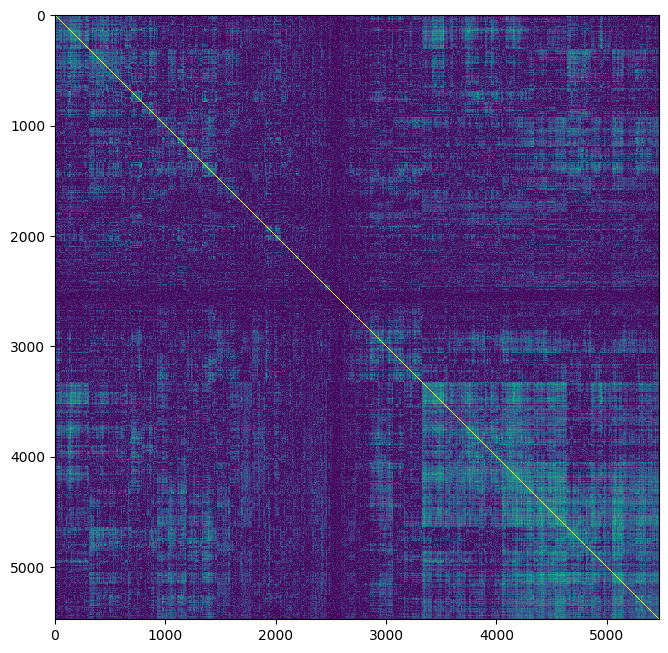

In [126]:
order = np.array(hierarchy.dendrogram(hierarchy.ward(cov),no_plot=True)['ivl'], dtype=int)
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(cov[order, :][:, order])
plt.show()

In [ ]:
filtered_train = filtered_train[cols_filtered]

### Batch Effects
- Do we have to worry about them?
- May have to do this high up in the process

## Unsupervised Machine Learning Method Analysis

### Scale before PCA

In [46]:
scaler = StandardScaler()
train_genes_scaled = scaler.fit_transform(train_genes)
test_genes_scaled = scaler.transform(test_genes)

### PCA

- For this, I would use PCA to cluster the data by using the top n number of PCs

In [13]:
# Make an instance of the model that explains 95% of the variance
pca = PCA(.95)

# Fit the model
pca.fit(train_genes_filtered)
pca.transform(train_genes_filtered)
pca.transform(test_genes_filtered)

print(f'PCA with {pca.n_components_} components explains {sum(pca.explained_variance_ratio_)} of the variance after filtering.')

PCA with 154 components explains 0.9503251337083257 of the variance after filtering.
